In [77]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

In [6]:
credit_df = pd.read_csv('German_Credit_Data.csv')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [7]:
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [8]:
credit_df['status'].value_counts()

# 0 Good credit, 1 bad credit

0    700
1    300
Name: status, dtype: int64

In [9]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [11]:
credit_df[X_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
dtypes: int64(6), object(7)
memory usage: 101.7+ KB


In [12]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first = True)

In [15]:
encoded_credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
996,30,3857,4,4,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,12,804,4,4,38,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [16]:
encoded_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int64
 1   amount                 1000 non-null   int64
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int64
 5   num_credits            1000 non-null   int64
 6   checkin_acc_A12        1000 non-null   uint8
 7   checkin_acc_A13        1000 non-null   uint8
 8   checkin_acc_A14        1000 non-null   uint8
 9   credit_history_A31     1000 non-null   uint8
 10  credit_history_A32     1000 non-null   uint8
 11  credit_history_A33     1000 non-null   uint8
 12  credit_history_A34     1000 non-null   uint8
 13  savings_acc_A62        1000 non-null   uint8
 14  savings_acc_A63        1000 non-null   uint8
 15  savings_acc_A64        1000 non-null   

In [17]:
X = encoded_credit_df
y = credit_df['status']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Decision Tree

In [22]:
# criterion to gini, max_depth to 3  
# defaul values for other parameters.

modelDT = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [23]:
modelDT.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=3)

In [24]:
model_score_train = modelDT.score(X_train, y_train)
print("Training score: ",model_score_train)
model_score_test = modelDT.score(X_test, y_test)
print("Testing score: ",model_score_test)#Accuracy

Training score:  0.7471428571428571
Testing score:  0.7266666666666667


In [26]:
y_pred = modelDT.predict(X_test)
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

0.5835743204164258
0.7266666666666667


#### Displaying the Tree

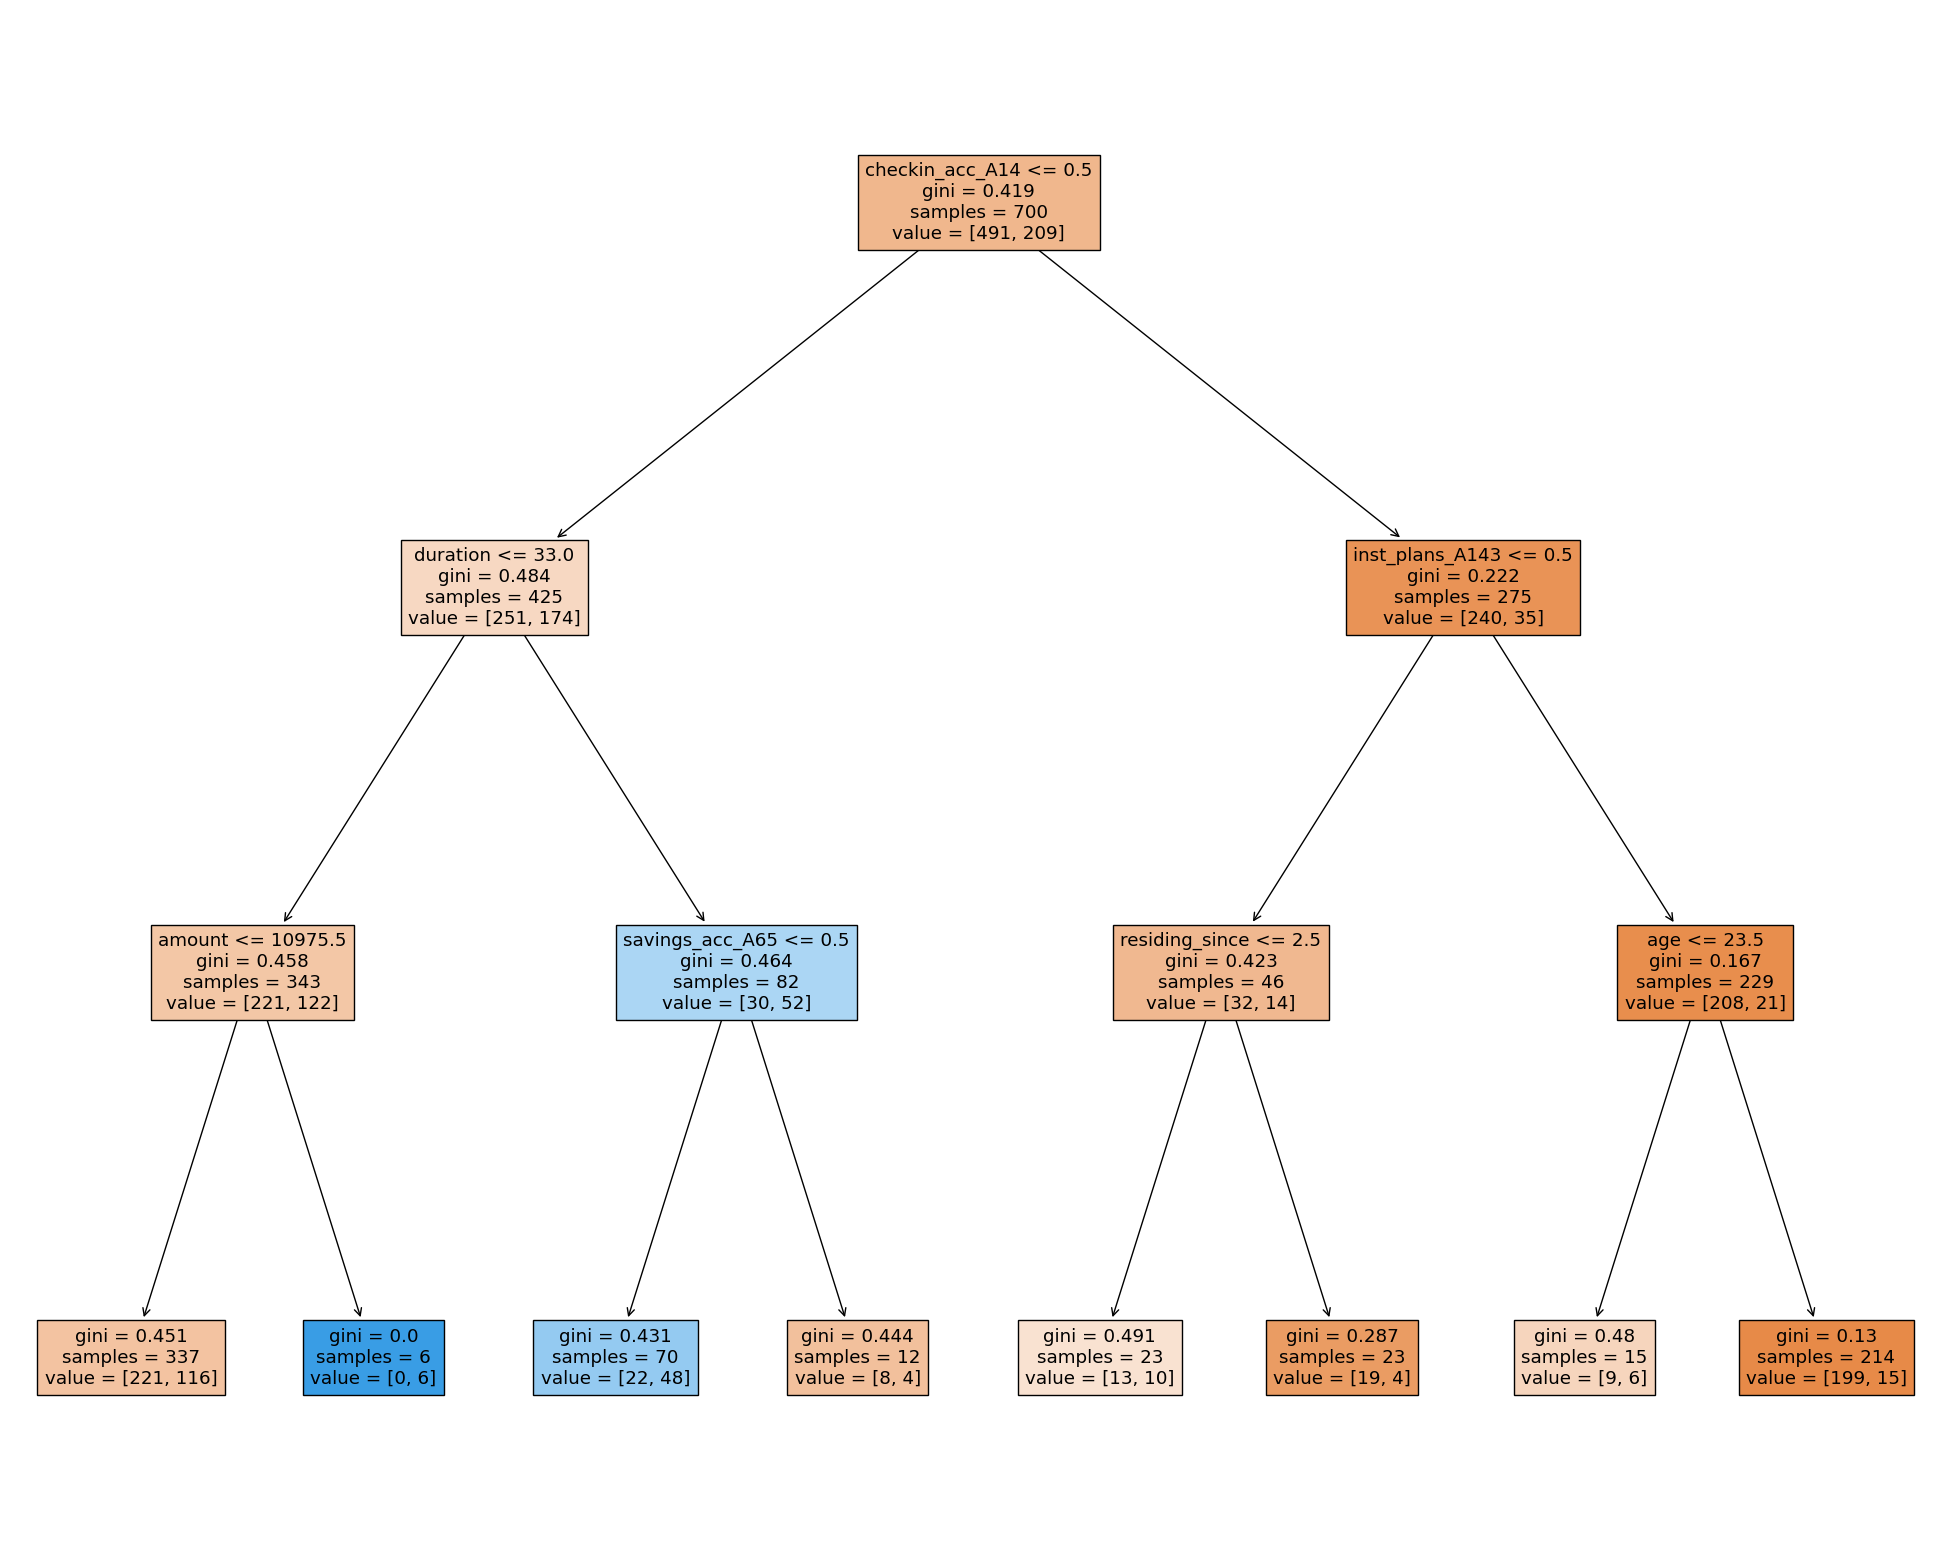

In [29]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(modelDT,feature_names=X_train.columns,
                   filled=True)

In [31]:
param = [{'criterion': ['gini','entropy'], 'max_depth': range(2,10)}]

model = DecisionTreeClassifier()

modelCV = GridSearchCV(model, param, cv=10, scoring = 'roc_auc')

modelCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [32]:
modelCV.best_score_

0.6830090864917396

In [33]:
modelCV.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [35]:
pred_y = modelCV.predict(X_test)
print(metrics.roc_auc_score(y_test, pred_y))
print(metrics.accuracy_score(y_test, pred_y))

0.5713497029286503
0.6966666666666667


In [36]:
print(metrics.confusion_matrix(y_test,pred_y))

[[186  23]
 [ 68  23]]


In [37]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       209
           1       0.50      0.25      0.34        91

    accuracy                           0.70       300
   macro avg       0.62      0.57      0.57       300
weighted avg       0.66      0.70      0.66       300



In [44]:
auc = metrics.roc_auc_score(y_test, modelCV.predict(X_test))
auc

0.5713497029286503

#### Random Forests

In [40]:
no_of_features = len(X_train.columns)

In [41]:
depth = int(np.log2(no_of_features))
depth

4

In [42]:
## Initializing the Random Forest Classifier with max_dept and n_estimators

modelRF = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=101)

# max_depth - log2(no. of features), log()

modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=101)

In [43]:
print(metrics.roc_auc_score(y_test, modelRF.predict(X_test)))
print(metrics.accuracy_score(y_test, modelRF.predict(X_test)))

0.521978021978022
0.71


In [45]:
#Grid Search
## Configuring parameters and values for searched

params = [{'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 150],
           'max_features': ['sqrt', 0.2, .3, .5]}]

# square root of number of features in the dataset
# 20%, 30%, 50% of the total no. of features
## Initializing the RF classifier

modelRF = RandomForestClassifier(random_state=101)

## Configuring search with the tunable parameters

modelCV = GridSearchCV(modelRF, params, cv=10, scoring='roc_auc')

## Fitting the training set

modelCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [46]:
modelCV.best_score_

0.7557102040816326

In [47]:
modelCV.best_params_

{'max_depth': 10, 'max_features': 0.3, 'n_estimators': 150}

In [48]:
#Building the model with best params
## Initializing the Random Forest Model with the optimal values

model_bp = RandomForestClassifier(max_depth= 10, n_estimators=150, 
                                  max_features = .3, oob_score=True, 
                                  random_state=101)

## Fitting the model with the training set
# oob_score=True
# class balanced

model_bp.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.3, n_estimators=150,
                       oob_score=True, random_state=101)

In [49]:
metrics.roc_auc_score(y_test, model_bp.predict(X_test))

0.6258478363741522

In [52]:
print(confusion_matrix(y_test,model_bp.predict(X_test)))

[[195  14]
 [ 62  29]]


In [54]:
print(metrics.classification_report(y_test,  model_bp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       209
           1       0.67      0.32      0.43        91

    accuracy                           0.75       300
   macro avg       0.72      0.63      0.63       300
weighted avg       0.73      0.75      0.71       300



In [55]:
model_bp.oob_score_

0.75

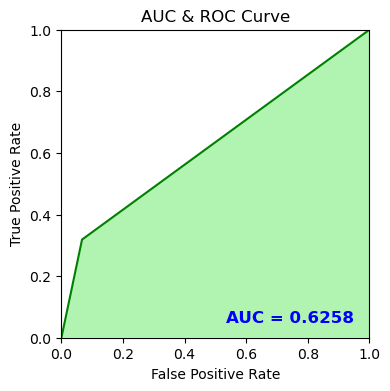

In [59]:
#Drawing the RoC curve
auc = metrics.roc_auc_score(y_test, model_bp.predict(X_test))

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, model_bp.predict(X_test))

plt.figure(figsize=(8, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### Feature Importance

In [62]:
# Create a dataframe to store the features and their corresponding
# importances

feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': model_bp.feature_importances_})

In [63]:
## Sorting the features based on their importances with most
## important feature at top.

feature_rank = feature_rank.sort_values('importance', ascending = False)

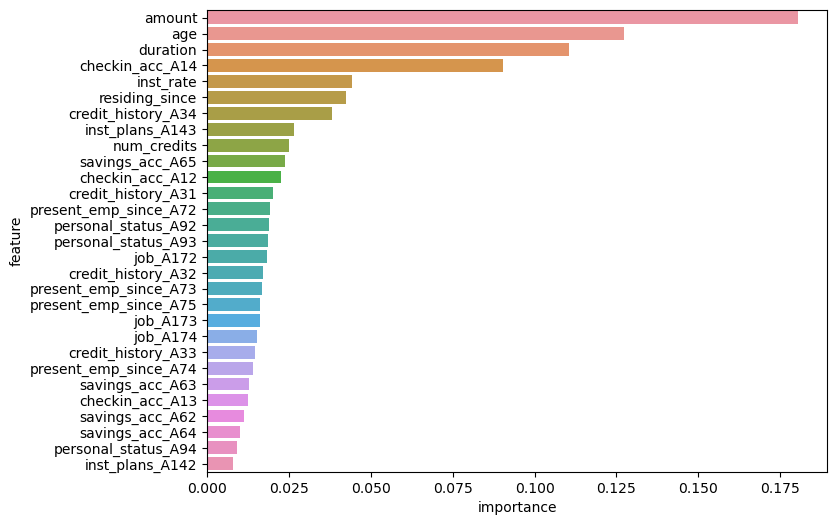

In [64]:
plt.figure(figsize=(8, 6))

# plot the values

sn.barplot(y = 'feature', x = 'importance', data = feature_rank);

In [65]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,amount,0.180274,18.027427
4,age,0.127211,30.748490
0,duration,0.110383,41.786748
8,checkin_acc_A14,0.090499,50.836698
2,inst_rate,0.044287,55.265374
3,residing_since,0.042421,59.507446
12,credit_history_A34,0.038151,63.322569
25,inst_plans_A143,0.026428,65.965382
5,num_credits,0.024940,68.459369
16,savings_acc_A65,0.023955,70.854881


#### AdaBoost

In [67]:
## Initializing Decision Tree Classifier to use as base classifier

dt_base_model = DecisionTreeClassifier()

# Initializing AdaBoost classifier with 200 classifers

ada_model = AdaBoostClassifier(dt_base_model, n_estimators=200, random_state=101)

# Fitting AdaBoost model to training set

ada_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=200,
                   random_state=101)

In [72]:
print(metrics.classification_report(y_test, ada_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       209
           1       0.46      0.46      0.46        91

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.67      0.67      0.67       300



In [71]:
auc = metrics.roc_auc_score(y_test,ada_model.predict(X_test))
auc

0.6135443503864557

In [73]:
model_score_ada = ada_model.score(X_train, y_train)
print("Training score: ",model_score_ada)
model_score_at = ada_model.score(X_test, y_test)
print("Testing score: ",model_score_at)#Accuracy

Training score:  1.0
Testing score:  0.6733333333333333


#### Gradient Boosting

In [75]:
## Initializing Gradient Boosting with 500 estimators and max
## depth as 10
model_gb = GradientBoostingClassifier(n_estimators=500, max_depth=10, random_state=101)

## Fitting gradient boosting model to training set

model_gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=101)

In [85]:
auc = roc_auc_score(y_test, model_gb.predict(X_test))
print(auc)
auc1 = metrics.roc_auc_score(y_test, model_gb.predict_proba(X_test)[:,1])#probability value of roc_auc curve
print(auc1)

0.5961669909038331
0.7327935222672065


In [79]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV

param = [{'n_estimators': [100, 200, 400], 'learning_rate': [.01,.05,.1]}]

model = GradientBoostingClassifier(random_state=101)

modelCV = GridSearchCV(model, param, cv=10, scoring = 'roc_auc')

modelCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=101),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1],
                          'n_estimators': [100, 200, 400]}],
             scoring='roc_auc')

In [80]:
modelCV.best_params_

{'learning_rate': 0.05, 'n_estimators': 200}

In [81]:
model_score_grad = modelCV.score(X_train, y_train)
print("Training score: ",model_score_grad)
model_score_gradT = modelCV.score(X_test, y_test)
print("Testing score: ",model_score_gradT)#Accuracy

Training score:  0.961293717537688
Testing score:  0.7818497292181503


In [82]:
modelCV.best_score_

0.7397752186588921

In [84]:
print(metrics.classification_report(y_test,  modelCV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.63      0.41      0.49        91

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.75      0.73       300

